# CLASSIFICATION


Dataset source: https://www.openml.org/d/57

## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('dataset_57_hypothyroid.csv')

## Viewing Data

In [2]:
data.shape

(3772, 30)

Missing values are marked as '?'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3772 non-null object
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3772 non-null 

## Dataset Summary:
- Features: 29
     - Categorical columns: 21
     - Ordinal columns: 2
- Rows: 3772
- Percentage of missing values: 5.3%
- Target Value: 'Class'

# Replacing '?' missing values with NaN

In [4]:
data = data.replace('?', np.nan)

In [5]:
data.isna().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

# Transformation of data 

One Hot encoding

In [6]:
data_onehot = pd.get_dummies(data, columns = ['referral_source'], prefix = ['ref_sr'])

Replacing Ordinal Values

In [7]:
data_onehot['Class'].replace(['negative','compensated_hypothyroid','primary_hypothyroid','secondary_hypothyroid'], [0,1,2,3], inplace=True)

Mapping Nominal Values

In [8]:
data_onehot['sex'].replace(['M', 'F'], [0,1], inplace=True)
data_onehot['on_thyroxine'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['query_on_thyroxine'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['on_antithyroid_medication'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['sick'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['pregnant'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['thyroid_surgery'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['I131_treatment'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['query_hypothyroid'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['query_hyperthyroid'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['lithium'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['goitre'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['tumor'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['hypopituitary'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['psych'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['TSH_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['T3_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['TT4_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['T4U_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['FTI_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['TBG_measured'].replace(['f', 't'], [0,1], inplace=True)

In [9]:
data_onehot = data_onehot.dropna(subset=['sex'])
data_onehot['sex'] = data_onehot['sex'].astype(int)

In [10]:
data_onehot.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI_measured,FTI,TBG_measured,TBG,Class,ref_sr_STMW,ref_sr_SVHC,ref_sr_SVHD,ref_sr_SVI,ref_sr_other
0,41,1,0,0,0,0,0,0,0,0,...,1,109,0,NaN,0,0,1,0,0,0
1,23,1,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,0,0,0,0,1
2,46,0,0,0,0,0,0,0,0,0,...,1,120,0,NaN,0,0,0,0,0,1
3,70,1,1,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,0,0,0,0,1
4,70,1,0,0,0,0,0,0,0,0,...,1,70,0,NaN,0,0,0,0,1,0


# Dealing with missing values

In [11]:
data_onehot = data_onehot.drop(['TBG'], axis=1)

In [12]:
data_onehot.isna().sum()

age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          352
T3_measured                    0
T3                           745
TT4_measured                   0
TT4                          217
T4U_measured                   0
T4U                          367
FTI_measured                   0
FTI                          365
TBG_measured                   0
Class                          0
ref_sr_STMW                    0
ref_sr_SVHC                    0
ref_sr_SVH

In [13]:
data_onehot['age'] = data_onehot['age'].astype(float)
data_onehot['TSH'] = data_onehot['TSH'].astype(float)
data_onehot['T3'] = data_onehot['T3'].astype(float)
data_onehot['TT4'] = data_onehot['TT4'].astype(float)
data_onehot['T4U'] = data_onehot['T4U'].astype(float)
data_onehot['FTI'] = data_onehot['FTI'].astype(float)

In [14]:
data_onehot.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,Class,ref_sr_STMW,ref_sr_SVHC,ref_sr_SVHD,ref_sr_SVI,ref_sr_other
0,41.0,1,0,0,0,0,0,0,0,0,...,1.14,1,109.0,0,0,0,1,0,0,0
1,23.0,1,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,0,0,0,0,0,1
2,46.0,0,0,0,0,0,0,0,0,0,...,0.91,1,120.0,0,0,0,0,0,0,1
3,70.0,1,1,0,0,0,0,0,0,0,...,NaN,0,NaN,0,0,0,0,0,0,1
4,70.0,1,0,0,0,0,0,0,0,0,...,0.87,1,70.0,0,0,0,0,0,1,0


Replacing Nulls with Mode

In [15]:
data_onehot.fillna(data_onehot.mode().iloc[0], inplace=True)

In [16]:
data_onehot.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
Class                        0
ref_sr_STMW                  0
ref_sr_SVHC                  0
ref_sr_SVHD                  0
ref_sr_SVI                   0
ref_sr_o

In [17]:
data_onehot.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,Class,ref_sr_STMW,ref_sr_SVHC,ref_sr_SVHD,ref_sr_SVI,ref_sr_other
0,41.0,1,0,0,0,0,0,0,0,0,...,1.14,1,109.0,0,0,0,1,0,0,0
1,23.0,1,0,0,0,0,0,0,0,0,...,0.99,0,100.0,0,0,0,0,0,0,1
2,46.0,0,0,0,0,0,0,0,0,0,...,0.91,1,120.0,0,0,0,0,0,0,1
3,70.0,1,1,0,0,0,0,0,0,0,...,0.99,0,100.0,0,0,0,0,0,0,1
4,70.0,1,0,0,0,0,0,0,0,0,...,0.87,1,70.0,0,0,0,0,0,1,0


Histogram of Dataset

In [18]:
pd.DataFrame.hist(data_onehot, figsize = [40,40]);

Importing required libraries

In [19]:
from statistics import mean
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

# Splitting the data

In [20]:
y = data_onehot['Class']
X = data_onehot.drop(['Class'], axis = 1)

In [21]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Evaluation Strategy

We are interested to predict if a patient has hypothyroidism. Hence we fail if we wrongly classify someones as a false negative. Using a confusion matrix will be the best strategy here. 
Aim here will be to reduce False Negatives. So we have to increase Recall.

# KNN classification

In [22]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

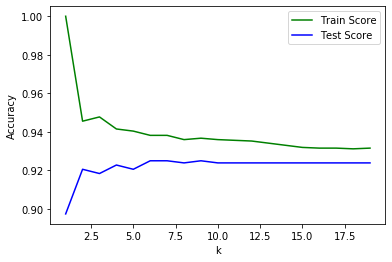

In [23]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))
pred_knn = knn.predict(X_test)

confusion = confusion_matrix(y_test, pred_knn)
print("\nConfusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_knn))

Train score: 0.9404
Train score: 0.9205

Confusion matrix:
[[831   3   0   0]
 [ 51   0   1   0]
 [ 14   2   3   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       0.75      0.16      0.26        19
           3       0.00      0.00      0.00         1

    accuracy                           0.92       906
   macro avg       0.42      0.29      0.31       906
weighted avg       0.87      0.92      0.89       906



c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

In [25]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(multi_class= 'auto', solver = 'liblinear', penalty = 'l1', C = c, max_iter=1000)
    log_l2 = LogisticRegression(multi_class= 'auto', solver = 'lbfgs', penalty = 'l2', C = c, max_iter=4000)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

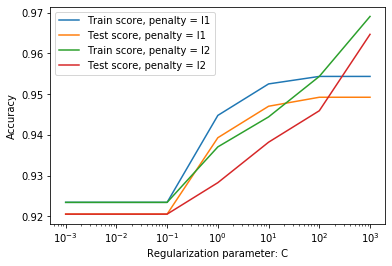

In [26]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [27]:
logreg = LogisticRegression(penalty='l2',C=10,random_state=0)
logreg.fit(X_train,y_train)

print("Train scores: {}".format(logreg.score(X_train, y_train)))
print("Test scores: {}".format(logreg.score(X_test, y_test)))


pred_lreg = logreg.predict(X_test)

confusion = confusion_matrix(y_test, pred_lreg)
print("\nConfusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_lreg))

Train scores: 0.9421944035346097
Test scores: 0.9326710816777042

Confusion matrix:
[[834   0   0   0]
 [ 51   0   1   0]
 [  8   0  11   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       834
           1       0.00      0.00      0.00        52
           2       0.92      0.58      0.71        19
           3       0.00      0.00      0.00         1

    accuracy                           0.93       906
   macro avg       0.46      0.39      0.42       906
weighted avg       0.88      0.93      0.90       906



c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Linear Support Vector Machine Classifier

In [28]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))



Train scores: 0.9410898379970545
Test scores: 0.9326710816777042


c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'On Thyroxine')

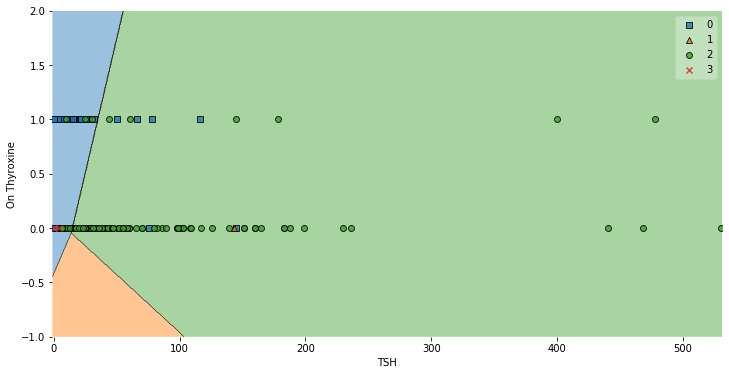

In [29]:
X1 = data_onehot[['TSH','on_thyroxine']].to_numpy()
y1 = data_onehot['Class'].to_numpy()

clf = LinearSVC()
clf.fit(X1,y1)

%matplotlib inline
fig ,ax= plt.subplots(figsize = (12,6))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X1, y1, clf)
plt.xlabel("TSH")
plt.ylabel("On Thyroxine")

In [30]:
clf = LinearSVC()
clf.fit(X_train,y_train)

pred_lsvc = clf.predict(X_test)

confusion = confusion_matrix(y_test, pred_lsvc)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_lsvc))

Confusion matrix:
[[834   0   0   0]
 [ 51   0   1   0]
 [  8   0  11   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       834
           1       0.00      0.00      0.00        52
           2       0.92      0.58      0.71        19
           3       0.00      0.00      0.00         1

    accuracy                           0.93       906
   macro avg       0.46      0.39      0.42       906
weighted avg       0.88      0.93      0.90       906



c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Kernelized Support Vector Machine

In [31]:
from sklearn.svm import SVC

c_range = [0.001,0.01,0.1,1,10,100]
g_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []
index=[]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svc_rbf = SVC(kernel='rbf', gamma=g,C=x)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        test_score_list.append(svc_rbf.score(X_test, y_test))

Text(0.5, 0, 'C and Gamma')

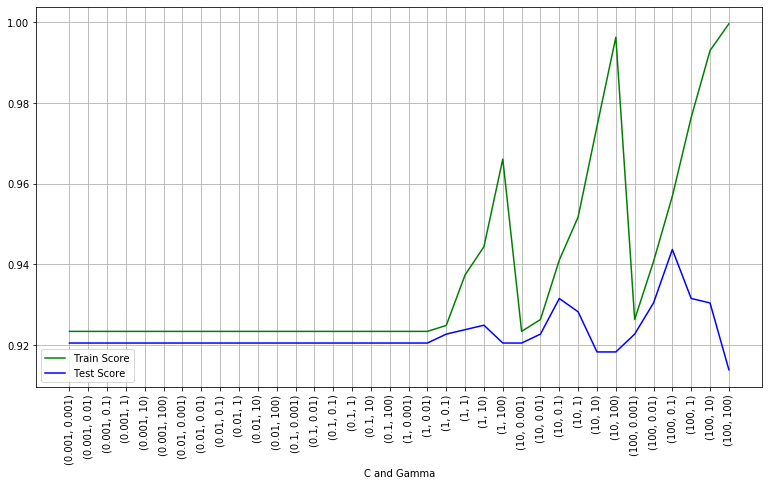

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('C and Gamma')

In [33]:
svc_rbf = SVC(kernel='rbf', gamma=0.01,C=10)
svc_rbf.fit(X_train,y_train)

print("Train scores: {}".format(svc_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svc_rbf.score(X_test, y_test)))

pred_svcrbf = svc_rbf.predict(X_test)

confusion = confusion_matrix(y_test, pred_svcrbf)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test, pred_svcrbf))

Train scores: 0.9263622974963182
Test scores: 0.9227373068432672
Confusion matrix:
[[834   0   0   0]
 [ 52   0   0   0]
 [ 17   0   2   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       1.00      0.11      0.19        19
           3       0.00      0.00      0.00         1

    accuracy                           0.92       906
   macro avg       0.48      0.28      0.29       906
weighted avg       0.87      0.92      0.89       906



c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVC with Poly Kernel

In [34]:
deg_range = [1,2,3,4,5,6,7]
c_range = [0.001,0.01,0.1,1,10,100]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svc_poly = SVC(kernel='poly', degree=x, C=c)
        svc_poly.fit(X_train,y_train)
        train_score_list.append(svc_poly.score(X_train,y_train))
        test_score_list.append(svc_poly.score(X_test, y_test))

c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

Text(0.5, 0, 'Degree and C')

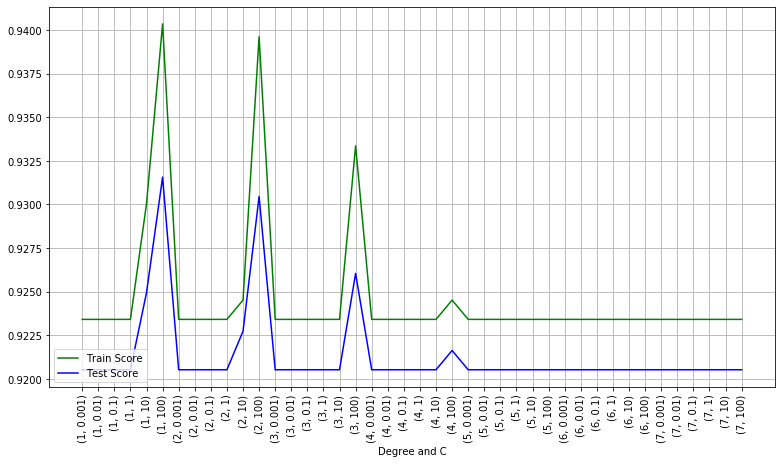

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('Degree and C')

Degree = 2 and C = 10 seems to be the best performing parameter

In [36]:
svc_poly = SVC(kernel='poly', degree=1, C=100)
svc_poly.fit(X_train,y_train)

print("Train scores: {}".format(svc_poly.score(X_train, y_train)))
print("Test scores: {}".format(svc_poly.score(X_test, y_test)))

pred_poly = svc_poly.predict(X_test)

confusion = confusion_matrix(y_test, pred_poly)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_poly))

c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train scores: 0.9403534609720177
Test scores: 0.9315673289183223
Confusion matrix:
[[834   0   0   0]
 [ 51   0   1   0]
 [  9   0  10   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       0.91      0.53      0.67        19
           3       0.00      0.00      0.00         1

    accuracy                           0.93       906
   macro avg       0.46      0.38      0.41       906
weighted avg       0.88      0.93      0.90       906



c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
c_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_lin = SVC(kernel='linear', C=x)
    svc_lin.fit(X_train,y_train)
    train_score_list.append(svc_lin.score(X_train,y_train))
    test_score_list.append(svc_lin.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.9234167893961709, 0.9234167893961709, 0.9241531664212077, 0.9392488954344624, 0.9429307805596465, 0.9668630338733432]
[0.9205298013245033, 0.9205298013245033, 0.9227373068432672, 0.9282560706401766, 0.9392935982339956, 0.9602649006622517]


Text(0.5, 0, 'C')

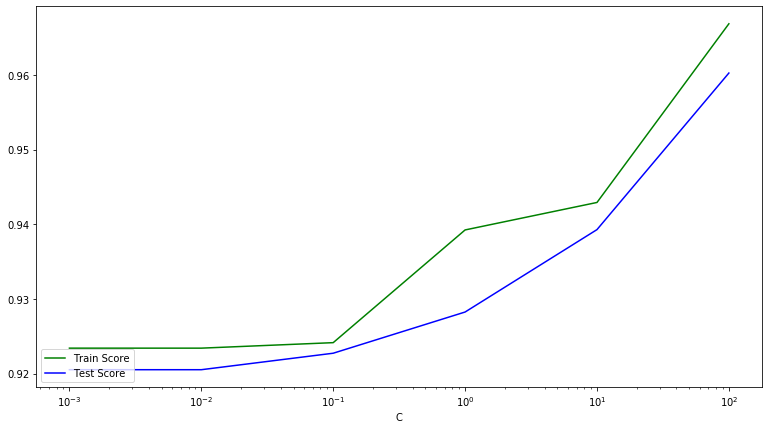

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

C = 10 seems to be the best parameter

In [39]:
svc_lin = SVC(kernel='linear', C=100)
svc_lin.fit(X_train,y_train)

print("Train scores: {}".format(svc_lin.score(X_train, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test, y_test)))

pred_lin = svc_lin.predict(X_test)

confusion = confusion_matrix(y_test, pred_lin)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_lin))

Train scores: 0.9668630338733432
Test scores: 0.9602649006622517
Confusion matrix:
[[833   1   0   0]
 [ 26  25   1   0]
 [  3   4  12   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       834
           1       0.83      0.48      0.61        52
           2       0.92      0.63      0.75        19
           3       0.00      0.00      0.00         1

    accuracy                           0.96       906
   macro avg       0.68      0.53      0.59       906
weighted avg       0.96      0.96      0.95       906



c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.996


In [41]:
max_range = [1,2,3,4,5]

train_score_list = []
test_score_list = []

for m in max_range:
    dtree = DecisionTreeClassifier(max_depth=m, random_state=0)
    dtree.fit(X_train_org, y_train)
    train_score_list.append(dtree.score(X_train_org,y_train))
    test_score_list.append(dtree.score(X_test_org, y_test))

In [42]:
print(train_score_list)
print(test_score_list)

[0.9528718703976435, 0.977540500736377, 0.9930044182621502, 0.9955817378497791, 0.9974226804123711]
[0.9580573951434879, 0.977924944812362, 0.9911699779249448, 0.9933774834437086, 0.9955849889624724]


Text(0.5, 0, 'Max Depth')

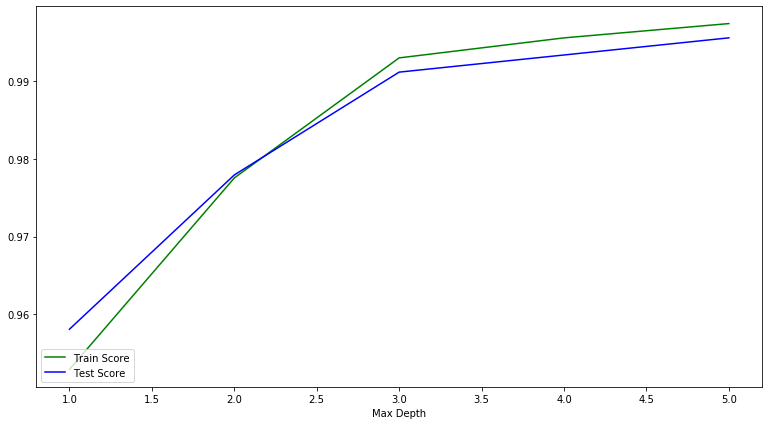

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(max_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(max_range, test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Max Depth')

Max Depth = 5 seems to be the best performing parameter

In [44]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train_org, y_train)

pred_d = dtree.predict(X_test_org)

confusion = confusion_matrix(y_test, pred_d)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_d))

Confusion matrix:
[[829   4   1   0]
 [  0  52   0   0]
 [  1   1  17   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       834
           1       0.91      1.00      0.95        52
           2       0.94      0.89      0.92        19
           3       0.00      0.00      0.00         1

    accuracy                           0.99       906
   macro avg       0.71      0.72      0.72       906
weighted avg       0.99      0.99      0.99       906



c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


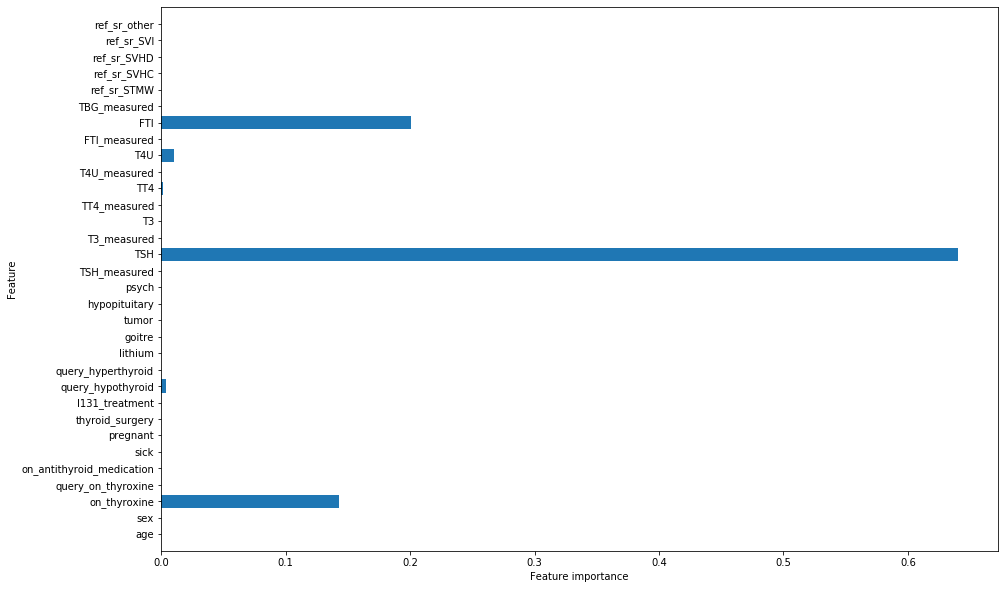

In [45]:
%matplotlib inline
def plot_feature_importances(model):
    fig ,ax= plt.subplots(figsize = (15,10))
    n_features = X_train_org.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_org.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

TSH is the most important feature

# Best Performing Model - Decision Tree Classifier
- Train Score: 0.997
- Test Score:  0.995
- Accuracy:    0.99
- Recall:      0.99

# PROJECT BY - Group 7
## Akhilandeshwari Bekkary (axb176530)
## Anantha Shashidhar Karunakaram(axk176830)